<a href="https://colab.research.google.com/github/Bengisunz/CRM-Analytics/blob/master/Analyticsdata_Analysis_Big_Query_Beng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Bengisu Öniz

13.11.2019


##About the Data & Case

The table is:
bigquery-public-data:google_analytics_sample.ga_sessions_20170801


**Questions**

1. How many sessions do users create on average within the day?
2. What is the conversion rate per traffic medium?
3. How many hits do users generate per visit on average on the platform? 
4. What is the top 5 country in terms of the amount of traffic (visits)

5. How much time passes until users click on a product (hits.eventInfo.eventAction = 'Product Click')?

Using Python or R (You can query the columns you need for each analysis from BigQuery and then export them as CSV and load into Python or R. The aggregation level should be ideally one row per each visit.):

6. Visualise the visits per hour of the day.
7. What is the peak hour for visits with transactions? Annotate it on the plot of Task 6.
8. Plot a histogram of time spent on the platform.
9. Do you see any correlation between time spent on the platform and the total revenue? Try to explain with a plot and comment on it.



l want to check the main metrics of the web page at first.


| date  |visits   |pageviews  |transactions |revenue
|:--:|:--:|:--:|:--:|:--:|
| 20170801|	2556	|10939|	45	|8304.94  |

## Downloading Neccasary Python Libraries

In [1]:
#@title
# Google Drive  ortamına bağlanma
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.pyplot import figure
import plotly.graph_objects as go
from datetime import datetime


%matplotlib inline

plt.style.use("seaborn-notebook")

## 1. How many sessions do users create on average within the day? 


| Row  |AVG_Sessions   |
|:--:|:--:|
|  1 | 1.1146  |


Average sessions user create within the day is 1.12

  
# 2. What is the conversion rate per traffic medium? 

| Conversion_rate  | trafficSource_medium  |
|--:|---|
|   0.019390581717451522|  	(none) |
| 0.003194888178913738	|  referral    |
|  0.0 | 	organic |   |
| 0.0	|  cpm  |   |
| 0.0	|  affiliate    |

#3. How many hits do users generate per visit on average on the platform?


Average of the hits user generate per visit is	4.85

# 4. What is the top 5 country in terms of the amount of traffic (visits)? 

| Country  | Visits  |
|--:|---|
|   United States|  	1287 |
| India	|  155    |
|  United Kingdom | 	142 |   |
| Germany	|  91  |   |
| Canada	|  85    |


# 5. How much time passes until users click on a product (hits.eventInfo.eventAction = 'Product Click')? 

In [88]:
#@title About the data

path = "/content/drive/My Drive/dh_data/q5_data.csv"
data = pd.read_csv(path)
data.head()


,fullVisitorId,visitid,visitStartTime,hits_time,start_time12,hits_time12
0,138058039294367332,1501628807,1501628807,0,2017-08-01 23:06:47 UTC,2017-08-01 23:06:47 UTC
1,7605971862730185115,1501580187,1501580187,37012,2017-08-01 09:36:27 UTC,2017-08-01 09:37:04.012 UTC
2,4107476716931948379,1501574999,1501574999,36298,2017-08-01 08:09:59 UTC,2017-08-01 08:10:35.298 UTC
3,1792126295682358590,1501577127,1501577127,36749,2017-08-01 08:45:27 UTC,2017-08-01 08:46:03.749 UTC
4,1281234459613429134,1501586692,1501586692,25834,2017-08-01 11:24:52 UTC,2017-08-01 11:25:17.834 UTC


In [0]:
#@title Verifying the times differences 

list_hits=[]
for i in range(len(data["hits_time12"])):
  time = data["hits_time12"].loc[i][:-4]
  list_hits.append(time)


list_hits_date=[]
for i in range(len(list_hits)):
  if len(list_hits[i]) == 19: #without micro seconds 
    time_short = datetime.strptime(list_hits[i], '%Y-%m-%d %H:%M:%S')
    list_hits_date.append(time_short)
  else:
    time = datetime.strptime(list_hits[i], '%Y-%m-%d %H:%M:%S.%f')
    list_hits_date.append(time)  


data["hits_time_format"] = list_hits_date   

list_startime=[]
for i in range(len(data["start_time12"])):
  time = data["start_time12"].loc[i][:-4]
  list_startime.append(time)


list_starttime_date=[]
for i in range(len(list_startime)):
  if len(list_startime[i]) == 19: #without micro seconds 
    time_short = datetime.strptime(list_startime[i], '%Y-%m-%d %H:%M:%S')
    list_starttime_date.append(time_short)
  else:
    time = datetime.strptime(list_startime[i], '%Y-%m-%d %H:%M:%S.%f')
    list_starttime_date.append(time)

data["visits_time_format"] = list_starttime_date 

differences=[]
for i in range(len(list_starttime_date)):
    diff= (list_hits_date[i] - list_starttime_date[i]).total_seconds()
    differences.append(diff)

data["differences"] = differences     

mean_diff_per_visitor = data.groupby("fullVisitorId").mean()[["differences"]]
mean_diff_per_visitor.sample(10)

In [96]:
#@title Basic Stattistics of the time passes until users click on a product
data["differences"].describe()

count     411.000000
mean      489.200579
std       717.511784
min         0.000000
25%        85.559000
50%       221.681000
75%       617.646500
max      5376.459000
Name: differences, dtype: float64

**Average time passes for users to click on a product after they start to be active on the site is 489 seconds. % 75 of the visiters click on a product after 618 seconds after they visit to platfrom.**




In [95]:
#@title Histogram of Time Passes until Users Click on a Product

fig = px.histogram(data, x="differences", nbins=100)
fig.show()

# 6. Visualise the visits per hour of the day. 
#  7. What is the peak hour for visits with transactions? Annotate it on the plot of Task 6. 

In [0]:
#@title About the data

path = "/content/drive/My Drive/dh_data/q_7_6.csv"
veri = pd.read_csv(path)
veri.head()

,sessionHour,sessionCount,transactions
0,0,87,0
1,1,102,0
2,2,84,3
3,3,99,0
4,4,79,2


In [0]:
#@title Transforming the data for plotting

df_melt = veri.melt(id_vars='sessionHour', value_vars=['sessionCount', 'transactions'])
df_melt.head()

,sessionHour,variable,value
0,0,sessionCount,87
1,1,sessionCount,102
2,2,sessionCount,84
3,3,sessionCount,99
4,4,sessionCount,79


In [0]:
#@title Number of Visits and Transactions per Hour of the Day
px.line(df_melt, x='sessionHour' , y='value' , color='variable')

The peak time of the visits is 8 pm.
The peak time of the visits is 2 pm. The number of the visits at 2pm is also higher than the average visits. It may be indicated that visitors check the products at eveninig times, buy the product after lunch time.

# 8. Plot a histogram of time spent on the platform. 

In [0]:
#@title About the Data

path = "/content/drive/My Drive/dh_data/notcounted_8.csv"
data = pd.read_csv(path)
data.head()

,timeOnSite,fullVisitorId
0,21,95632012
1,22,4468813
2,14,76399816
3,60,13231436
4,6,517038168


In [0]:
#@title Histogram of Time Spent on the Platform

fig = px.histogram(data, x="timeOnSite", nbins=150)
fig.show()

Most of the visitors spend time on the platform between 0- 99 seconds.
It is seen that there are outliers who spend time on the platform more than 2000 seconds.

# 9. Do you see any correlation between time spent on the platform and the total revenue? Try to explain with a plot and comment on it.

In [0]:
#@title About the Data

path = "/content/drive/My Drive/dh_data/q_9.csv"
data_q9 = pd.read_csv(path)
data_q9.head()

,timeOnSite,totalTransactionRevenue,fullVisitorId
0,21,NaN,9563201247433687898
1,22,NaN,446881336866901267
2,14,NaN,7639981567880780476
3,60,NaN,1323143631015435941
4,6,NaN,5170381678885002061


In [0]:
#@title
column_names=["timeOnSite","totalTransactionRevenue"]
data_for_corr= data_q9[column_names]

                         timeOnSite  totalTransactionRevenue
timeOnSite                 1.000000                 0.049149
totalTransactionRevenue    0.049149                 1.000000


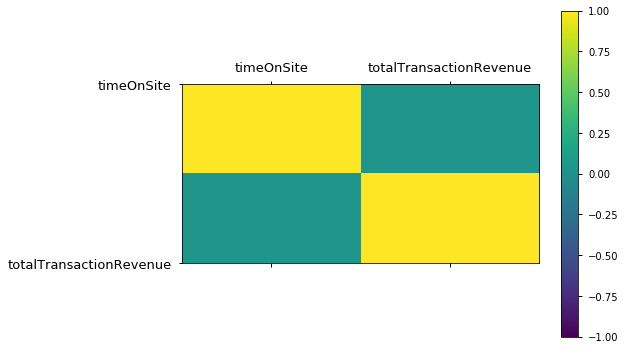

In [0]:
#@title
def CheckingCorrelations(df):

    column_names=df.columns 
    num = len(column_names)
    correlations = df[column_names].corr()
    print(correlations)

    fig = plt.figure(figsize=[8, 6])
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1) #, cmap='BuPu'
    fig.colorbar(cax)
    ticks = np.arange(0, num, 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(column_names)
    ax.set_yticklabels(column_names)
    ax.tick_params(labelsize=13)
    plt.show()

CheckingCorrelations(data_for_corr)

In contrast to common expectation  there is no relation between time spent on the platform and the total revenue



#10. Try to visualise the pair distribution (2D) of the time spent on the platform and total number of hits, for each visit. Compare and comment on such distribution for top two countries with most traffic. 


**USA**


---






In [0]:
#@title About the Data

path = "/content/drive/My Drive/dh_data/q10_US.csv"
data_q10_us = pd.read_csv(path)
data_q10_us.head()

,hits,timeonsite,visitid
0,2,6,1501639088
1,2,1,1501647074
2,2,154,1501632079
3,2,48,1501636720
4,2,30,1501617904


In [0]:
#@title Time Spent on the Platform vs Total Number of Hits in USA

fig = px.scatter(data_q10_us, x="hits", y="timeonsite")
fig.show()

                hits  timeonsite
hits        1.000000    0.674747
timeonsite  0.674747    1.000000


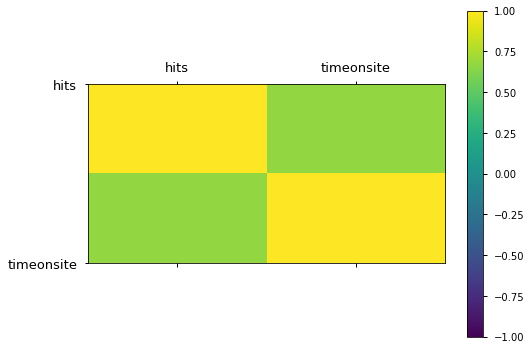

In [0]:
#@title  Correlation of Time Spent on the Platform and Total Number of Hits in USA

data_q10_us_corr=data_q10_us[["hits", "timeonsite"]]
CheckingCorrelations(data_q10_us_corr)

It is seen that there is a positive correlation between the time spent on the platform and total number of hits, for each visit in USA. When people on the platform, they do actions

**India**


---





In [0]:
#@title About the Data

path = "/content/drive/My Drive/dh_data/q10_India.csv"
data_q10_india = pd.read_csv(path)
data_q10_india.head()

,hits,timeonsite,visitid
0,2,21,1501581598
1,2,22,1501604163
2,2,30,1501600754
3,2,353,1501587353
4,2,7,1501614994


In [0]:
#@title Time spent on the platform vs Total Number of Hits in India

fig = px.scatter(data_q10_india, x="hits", y="timeonsite")
fig.update_traces(marker=dict(size=5,color='rgba(255, 182, 193, .9)',line=dict(width=2,color='rgba(152, 0, 0, .8)')))
fig.show()

                hits  timeonsite
hits        1.000000    0.243126
timeonsite  0.243126    1.000000


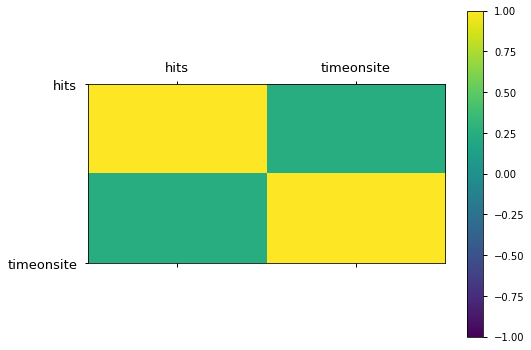

In [0]:
#@title  Correlation of Time spent on the platform and Total Number of Hits in India

data_q10_india_corr=data_q10_india[["hits", "timeonsite"]]
CheckingCorrelations(data_q10_india_corr)

It is seen that there is not a low correlation between the time spent on the platform and total number of hits, for each visit in India

# Additional Analyzes

11. Average transaction per user is 1.0714

12. The number of transactions per browser

|device_browser|total_transactions|
|:--:|:--:|
|Chrome|41|
 |Safari|3|
 |Firefox|1|
 |Internet Explorer|null|
|UC Browser|null|









``` sql
SELECT
    fullVisitorId,
    visitId,
    visitNumber,
    hits.hitNumber AS hitNumber,
    hits.page.pagePath AS pagePath
FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_20160801`, UNNEST(hits) as hits
WHERE
    hits.type="PAGE"
ORDER BY
    fullVisitorId,
    visitId,
    visitNumber,
    hitNumber
    
```



In [0]:
#@title

# create some data
xy = np.random.rand(4, 2)
xy_line = (0, 1)

# set up figure and ax
fig, ax = plt.subplots(figsize=(8,8))

# create the scatter plots
ax.scatter(xy[:, 0], xy[:, 1], c='blue')
for point, name in zip(xy, 'ABCD'):
    ax.annotate(name, xy=point, xytext=(0, -10), textcoords='offset points',
                color='blue', ha='center', va='center')
ax.scatter([0], [1], c='black', s=60)
ax.annotate('Perfect Classification', xy=(0, 1), xytext=(0.1, 0.9),
            arrowprops=dict(arrowstyle='->'))

# create the line
ax.plot(xy_line, 'r--', label='Random guess')
ax.annotate('Better', xy=(0.3, 0.3), xytext=(0.2, 0.4),
            arrowprops=dict(arrowstyle='<-'), ha='center', va='center')
ax.annotate('Worse', xy=(0.3, 0.3), xytext=(0.4, 0.2),
            arrowprops=dict(arrowstyle='<-'), ha='center', va='center')
# add labels, legend and make it nicer
ax.set_xlabel('FPR or (1 - specificity)')
ax.set_ylabel('TPR or sensitivity')
ax.set_title('ROC Space')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.savefig('scatter_line.png', dpi=80)

https://www.tablesgenerator.com/markdown_tables


BigQuery documentation: https://cloud.google.com/bigquery/docs/
https://www.lunametrics.com/blog/2016/02/11/querying-google-analytics-data-in-bigquery/

Don't forget the three important links:

schema: https://support.google.com/analytics/answer/3437719?hl=en
legacy: https://cloud.google.com/bigquery/docs/reference/legacy-sql
standard: https://cloud.google.com/bigquery/docs/reference/standard-sql/

Here you can find the instructions for visualising the dataset where the tests will be proved:

https://support.google.com/analytics/answer/7586738
--> https://bigquery.cloud.google.com/table/bigquery-public-data:google_analytics_sample.ga_sessions_20170801

https://support.google.com/analytics/answer/4419694


# BigQuery Codes

**Intro**

```sql

SELECT
  date,
  SUM(totals.visits) AS visits,
  SUM(totals.pageviews) AS pageviews,
  SUM(totals.transactions) AS transactions,
  SUM(totals.transactionRevenue)/1000000 AS revenue
FROM
  [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
GROUP BY
  date
ORDER BY
  date ASC

```

**Question 1**
```sql
select avg(sessions) as total_sessions from (
  select
    fullvisitorid,
    count(distinct visitid) as sessions,
    from [bigquery-public-data:google_analytics_sample.ga_sessions_20170801]
    group each by fullvisitorid)
```

**Question 2**

``` sql
SELECT
  (total_transactions_per_user / visit_count ) AS conversion,
  trafficSource.medium
FROM (
  SELECT
    COUNT(totals.visits) AS visit_count,
    COUNT(totals.transactions) AS total_transactions_per_user
  FROM
    [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
  GROUP BY
    trafficSource.medium)
    
```



**Question 3**


```sql
SELECT
( SUM(total_hits_per_user) / SUM(total_visits_per_user) ) AS
avg_hits_by_user_per_visit
FROM (SELECT
  fullVisitorId,
  SUM(totals.visits) AS total_visits_per_user,
  SUM(totals.hits) AS total_hits_per_user
FROM
  [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
WHERE
  totals.visits > 0
  AND totals.hits >= 1
GROUP BY
  fullVisitorId)

```
Source: https://support.google.com/analytics/answer/4419694?hl=en&ref_topic=3416089

**Question 3.2**


```sql

SELECT
  AVG(ratio_per_user)
FROM (
  SELECT
    SUM(total_hits_per_user/total_visits_per_user) OVER (PARTITION BY fullVisitorId) AS ratio_per_user
  FROM (
    SELECT
      fullVisitorId,
      SUM(totals.visits) AS total_visits_per_user,
      SUM(totals.hits) AS total_hits_per_user
    FROM
      [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
    WHERE
      totals.visits > 0
      AND totals.hits >= 1
    GROUP BY
      fullVisitorId))
      
```



**Question 4**

``` sql
SELECT
  geoNetwork.country AS Country,
  COUNT(visitId) AS Visits
FROM
  [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
WHERE
  totals.visits = 1
GROUP BY
  Country
ORDER BY
  Visits DESC
LIMIT
  5

```



**Question 5**

``` sql
select fullVisitorId , AVG(SECOND(difference_first)) as avg_minute_passes,
FROM (SELECT
  fullVisitorId,
  USEC_TO_TIMESTAMP(hits_time -start_time ) AS difference_first 
FROM (
  SELECT
    fullVisitorId,
    TIMESTAMP(INTEGER(visitStartTime*1000000)) AS start_time,
    TIMESTAMP(INTEGER(visitStartTime*1000000 + hits.time*1000)) AS hits_time
  FROM
    [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
  WHERE
    hits.eventInfo.eventAction = 'Product Click'))
GROUP BY fullVisitorId
```





``` sql
SELECT
  fullVisitorId,
  visitid,
  visitStartTime,
  hits.time,
  TIMESTAMP(INTEGER(visitStartTime*1000000)) AS start_time12,
  TIMESTAMP(INTEGER(visitStartTime*1000000 + hits.time*1000)) AS hits_time12
FROM
  [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
WHERE
  hits.eventInfo.eventAction = 'Product Click'

```



**Question 6**

```sql
SELECT
  COUNT(visitid) AS visits,
  time FROM (
  SELECT
    visitid,
    EXTRACT(HOUR
    FROM
      TIMESTAMP_MILLIS(visitStartTime*1000)) AS time
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
  WHERE
    totals.transactions>0 )
GROUP BY
  time
ORDER BY
  time

  


**Question 6.1**

from examples-legacy sql
``` sql

SELECT HOUR(SEC_TO_TIMESTAMP(visitStartTime)) AS sessionHour,
       COUNT(visitid) AS visits     
FROM  [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
GROUP BY sessionHour
```



**Question 7**

``` sql
SELECT  HOUR(SEC_TO_TIMESTAMP(visitStartTime)) AS sessionHour,
       COUNT(totals.visits) AS sessionCount,
       COUNT(totals.transactions) AS transactions
FROM [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
GROUP BY sessionHour
ORDER BY sessionHour, sessionCount DESC
```

**Question 8**

**TOTALS E UNNEST YAPMAK GEREKLİ Mİ?**

PS: timeOnScreen is null
Visitors
```sql

SELECT
  COUNT(fullVisitorId) AS num_visitors,
  timeOnSite
FROM (
  SELECT
    totals.timeOnSite as timeOnSite,
    fullVisitorId
  FROM
    `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
  WHERE
    totals.timeOnSite IS NOT NULL)
GROUP BY
  timeOnSite

```


```sql

SELECT
  totals.timeOnSite AS timeOnSite,
  fullVisitorId
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE
  totals.timeOnSite IS NOT NULL

```

**Question 9**

``` sql
SELECT
  totals.timeOnSite AS timeOnSite,
  totals.totalTransactionRevenue,
  fullVisitorId
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE
  totals.timeOnSite IS NOT NULL
```

**Question 10**

``` sql
SELECT
  totals.hits,
  totals.timeonsite,
  visitid
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE
  totals.timeonsite IS NOT NULL
  AND geoNetwork.country='United States'
```

**Query 11**

``` sql
SELECT
  (SUM (total_transactions_per_user) / COUNT(fullVisitorId) ) AS avg_total_transactions_per_user
FROM (
  SELECT
    fullVisitorId,
    SUM (totals.transactions) AS total_transactions_per_user
  FROM
   [bigquery-public-data.google_analytics_sample.ga_sessions_20170801]
  WHERE
    totals.transactions IS NOT NULL
  GROUP BY
    fullVisitorId)
```



**Query 12**

``` sql
SELECT device.browser AS device_browser,
            SUM(totals.transactions) as total_transactions
FROM [bigquery-public-data:google_analytics_sample.ga_sessions_20170801]
GROUP BY device_browser
ORDER BY total_transactions DESC
```



# References